Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 

In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('churn-modelling.csv')
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
for column in df:
    if df[column].dtypes == 'object':
        print(f"{column}: {df[column].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [11]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [13]:
scaler = MinMaxScaler()
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,False,False,False
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,False,False,True
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,False,False,False
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0,False,False,False
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0,False,False,True


In [30]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [31]:
X = df.drop('Exited', axis='columns')
y = df['Exited']

X = np.asarray(X).astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=37)

In [36]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.7546 - loss: 0.6281
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7947 - loss: 0.4754
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7973 - loss: 0.4536
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8094 - loss: 0.4466
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8133 - loss: 0.4318
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.8185 - loss: 0.4192
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8301 - loss: 0.3955
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8365 - loss: 0.3795
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8420 - loss: 0.3797
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8412 - loss: 0.3667
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8397 - loss: 0.3711
Epoch 12/100
235/235 

In [37]:
model.evaluate(X_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.8460 - loss: 0.3492


[0.33485493063926697, 0.8543999791145325]

In [38]:
y_pred = np.round(model.predict(X_test))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1991
           1       0.68      0.54      0.60       509

    accuracy                           0.85      2500
   macro avg       0.78      0.74      0.76      2500
weighted avg       0.85      0.85      0.85      2500



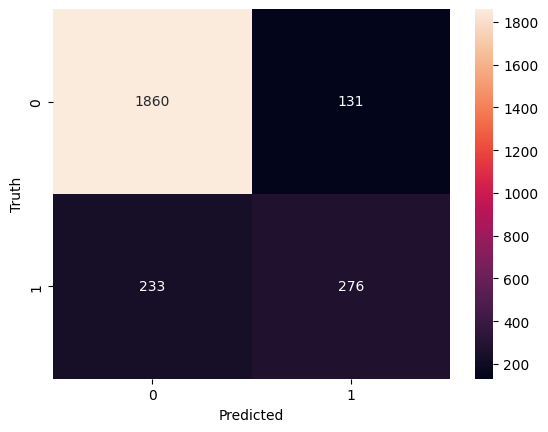

In [41]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()